In [2]:
#!pip install wordcloud

In [3]:
# Imporrtation des librairies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from nltk.corpus import stopwords

In [4]:
# charger le dataset

data = pd.read_csv("/Users/tiger/Documents/tweet_project/data/train.csv")
data

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [5]:
# Suppression colonne
data = data.drop(columns ="location") # on suprime la colonne "location" car elle ne nous servira pas

#donne manquante
data.dropna(inplace = True)

In [6]:
data

,id,keyword,text,target
31,48,ablaze,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
32,49,ablaze,We always try to bring the heavy. #metal #RT h...,0
33,50,ablaze,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
34,52,ablaze,Crying out for more! Set me ablaze,0
35,53,ablaze,On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0
...,...,...,...,...
7578,10830,wrecked,@jt_ruff23 @cameronhacker and I wrecked you both,0
7579,10831,wrecked,Three days off from work and they've pretty mu...,0
7580,10832,wrecked,#FX #forex #trading Cramer: Iger's 3 words tha...,0
7581,10833,wrecked,@engineshed Great atmosphere at the British Li...,0


# Preprocessing

In [8]:
# Suppression des stopwords

data["text"] = data["text"].apply(lambda j : re.sub(r"http\S+|www\.\S+", "", str(j).lower()))  # suppression des liens
data["text"] = data["text"].apply(lambda i : re.sub(r"@\w+","",str(i).lower()))    # suppression des mentions
data["text"] = data["text"].apply(lambda i : re.sub(r"#\w+","",str(i).lower()))    # suppression des hashtags
data["text"] = data["text"].apply(lambda i : re.sub(r"[0-9]@+","",str(i).lower()))   # suppression des chiffres
data["text"] = data["text"].apply(lambda i : re.sub(r"[',\-_!;?.:'0-9]", " ", str(i).lower()))   # suppression des symbole, ponctuations

# Keyword cleaning
data["keyword"] = data["keyword"].apply(lambda i : re.sub(r"[',\-_!;?.:*$0-9%']", " ", str(i).lower()))   # suppression des symbole, ponctuations

In [9]:
pd.set_option('display.max_colwidth', None)    
data

,id,keyword,text,target
31,48,ablaze,wholesale markets ablaze,1
32,49,ablaze,we always try to bring the heavy,0
33,50,ablaze,breaking news nigeria flag set ablaze in aba,1
34,52,ablaze,crying out for more set me ablaze,0
35,53,ablaze,on plus side look at the sky last night it was ablaze,0
...,...,...,...,...
7578,10830,wrecked,and i wrecked you both,0
7579,10831,wrecked,three days off from work and they ve pretty much all been wrecked hahaha shoutout to my family for that one,0
7580,10832,wrecked,cramer iger s words that wrecked disney s stock,0
7581,10833,wrecked,great atmosphere at the british lion gig tonight hearing is wrecked,0


In [10]:
data["keyword"].unique() 


array(['ablaze', 'accident', 'aftershock', 'airplane   accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew   up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown   up', 'body   bag', 'body   bagging',
       'body   bags', 'bomb', 'bombed', 'bombing', 'bridge   collapse',
       'buildings   burning', 'buildings   on   fire', 'burned',
       'burning', 'burning   buildings', 'bush   fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical   emergency',
       'cliff   fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'derailed

In [11]:
lemmatizer = WordNetLemmatizer()
stopwords = set(stopwords.words('english'))

# Preprocess the text column
data["text"] = data["text"].apply( lambda i: nltk.word_tokenize(i))
data["text"] = data["text"].apply( lambda word: [lemmatizer.lemmatize(j,pos='v') for j in word if not j in stopwords])

# Preprocess the keyword column
data["keyword"] = data["keyword"].apply( lambda u: nltk.word_tokenize(u))
data["keyword"] = data["keyword"].apply( lambda words: [lemmatizer.lemmatize(w,pos='v') for w in words ])

In [12]:
data

,id,keyword,text,target
31,48,[ablaze],"[wholesale, market, ablaze]",1
32,49,[ablaze],"[always, try, bring, heavy]",0
33,50,[ablaze],"[break, news, nigeria, flag, set, ablaze, aba]",1
34,52,[ablaze],"[cry, set, ablaze]",0
35,53,[ablaze],"[plus, side, look, sky, last, night, ablaze]",0
...,...,...,...,...
7578,10830,[wreck],[wreck],0
7579,10831,[wreck],"[three, days, work, pretty, much, wreck, hahaha, shoutout, family, one]",0
7580,10832,[wreck],"[cramer, iger, word, wreck, disney, stock]",0
7581,10833,[wreck],"[great, atmosphere, british, lion, gig, tonight, hear, wreck]",0


In [13]:
token = []
data["text"].apply( lambda k: token.extend(k))

31      None
32      None
33      None
34      None
35      None
        ... 
7578    None
7579    None
7580    None
7581    None
7582    None
Name: text, Length: 7552, dtype: object

In [14]:
from collections import Counter

# Nombre de token
nbr_token = len(token)
print("Nombre de token : ",nbr_token)

# Nombre de token unique
nbr_token_unique = len(set(token))
print("Nombre de token unique : ",nbr_token_unique)

# Nombre de token apparaissant 1 seul fois
occur = Counter(token)
nbr_tok_occur = [tok for tok, count in occur.items() if count == 1]
print("Nombre de token apparaissant 1 seul fois : ",len(nbr_tok_occur))

# Token les plus utilisé
nbr_tok_occur = Counter(token).most_common(2)
print("Token les plus utilisé : ",nbr_tok_occur)

Nombre de token :  65383
Nombre de token unique :  11379
Nombre de token apparaissant 1 seul fois :  6328
Token les plus utilisé :  [('&', 457), ('get', 440)]


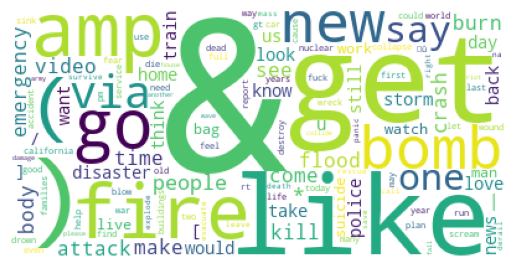

In [15]:
# Visualisation des tokens les plus fréquents (WordCloud)
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white').generate_from_frequencies(occur)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Modelisation

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

X = data["text"]
y = data["target"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

X_train = X_train.apply(lambda tokens: " ".join(tokens) if isinstance(tokens, list) else tokens)
X_test = X_test.apply(lambda tokens: " ".join(tokens) if isinstance(tokens, list) else tokens)

pipeline = Pipeline([('vector',TfidfVectorizer(max_features=3000)),
                    # ('dense_vect', Word2Vec(min_count=1, workers=1)),
                    ('classifier', RandomForestClassifier(n_estimators = 42, random_state=0))])

pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_test)

# Metrics

accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
f1_scor = f1_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)

print("Accuracy : ", accuracy)
print("Precision : ", precision)
print("f1_score : ", f1_scor)
print("recall_score : ", recall)
print("Report : ", classification_report(y_test,y_pred))

Accuracy :  0.7637326273990734
Precision :  0.7534246575342466
f1_score :  0.7113985448666128
recall_score :  0.6738131699846861
Report :                precision    recall  f1-score   support

           0       0.77      0.83      0.80       858
           1       0.75      0.67      0.71       653

    accuracy                           0.76      1511
   macro avg       0.76      0.75      0.76      1511
weighted avg       0.76      0.76      0.76      1511



In [18]:
#!pip install gensim

In [37]:
text = "#AFRICANBAZE: Breaking news:Nigeria flag set ablaze in Aba. http://t.co/2nndBGwyEi"
print(len(text))

82


In [41]:
list(data.columns)

['id', 'keyword', 'text', 'target']